In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
if False:
    df = pd.read_csv('GRF_F_V_PRO_left.csv')
    a = df.set_index(list(df.columns[0:3]))
    B = pd.DataFrame()
    B['all_cols'] = a.apply(lambda row: row.values, axis=1)
    B

In [109]:
class GRFSET:

    def  __init__(self, file):
        _df = pd.read_csv(file)
        _a = _df.set_index(list(_df.columns[0:3]))
        _B = pd.DataFrame()
        _B['all_cols'] = _a.apply(lambda row: row.values, axis=1)
        self.dataset = _B
        self.get_mean()
        self.get_std()
       
    def get_mean(self):
        self.set_mean = self.dataset.all_cols.mean()
        self.x = np.arange(len(self.set_mean))
        return self.set_mean

    def get_std(self):
        self.std_dev = np.vstack(self.dataset.all_cols).std(axis=0)
        return self.std_dev
    
    def plot(self, ax=None):
        if not ax:
            ax = plt.gca()
        ax.plot(self.x,self.set_mean, label='mean')
        ax.fill_between(self.x,self.set_mean+self.std_dev, self.set_mean-self.std_dev, facecolor='gray', alpha=0.5)

In [68]:
B = GRFSET('GRF_F_V_PRO_left.csv')
B.dataset

all_cols
SUBJECT_ID SESSION_ID TRIAL_ID                                                   
510        413        1         [0.0226329430719708, 0.0611133422581435, 0.114...
                      2         [0.0226307510492089, 0.0640861913461069, 0.120...
                      3         [0.0226286762563131, 0.0579813697685558, 0.105...
                      4         [0.0226265338840946, 0.0656991862028288, 0.128...
                      6         [0.022626876978863, 0.0652872843689575, 0.1248...
...                                                                           ...
93         999910375  6         [0.0372657165724635, 0.124201038853992, 0.2541...
                      7         [0.0372796608378798, 0.122560166035493, 0.2493...
                      9         [0.0372670968164889, 0.11932158663526, 0.23971...
                      10        [0.0372773732691664, 0.123183714438673, 0.2512...
                      11        [0.0372825331551578, 0.113353423313786, 0.2245...

[75732 rows x 1 columns]

In [ ]:
# plot first 100. it will take quite a while to plot all the 75732 steps in this dataset.
i = 0
for idx, data  in B.iterrows():
    wtf = data.values[0]
    y = np.array(wtf).squeeze()
    x = np.arange(len(y))
    plt.plot(x,y)
    i+=1
    if i>100:
        break

In [ ]:
## lets find mean and std dev from these guys

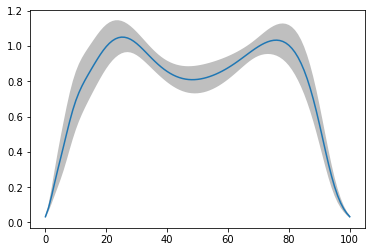

In [42]:
fig, ax = plt.subplots(1)
ax.plot(B.x,B.set_mean, label='mean')
ax.fill_between(B.x,B.set_mean+B.std_dev, B.set_mean-B.std_dev, facecolor='gray', alpha=0.5)

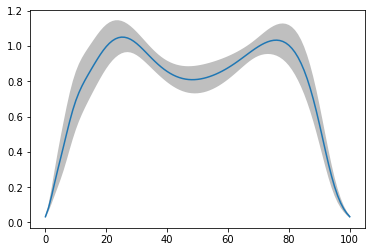

In [47]:
fig, ax = plt.subplots(1)
B.plot()

In [48]:
!ls

GRF_F_AP_PRO_left.csv	GRF_F_ML_PRO_right.csv	GRF_F_V_RAW_right.csv
GRF_F_AP_PRO_right.csv	GRF_F_V_PRO_left.csv	grf.ipynb
GRF_F_ML_PRO_left.csv	GRF_F_V_PRO_right.csv


In [69]:
A = GRFSET('GRF_F_V_PRO_right.csv')
A.dataset

all_cols
SUBJECT_ID SESSION_ID TRIAL_ID                                                   
510        413        1         [0.0226423363015369, 0.0663041155125114, 0.123...
                      2         [0.0226373254735626, 0.0631745689614534, 0.114...
                      3         [0.0226281739242455, 0.0662765081490035, 0.123...
                      4         [0.0226413615922072, 0.0675667159096707, 0.130...
                      6         [0.022628776391663, 0.0654154315661866, 0.1222...
...                                                                           ...
93         999910375  6         [0.0372969063789697, 0.119415899432529, 0.2406...
                      7         [0.0372677853323265, 0.11484437627536, 0.22839...
                      9         [0.0372740605967018, 0.11723832247515, 0.23429...
                      10        [0.0372697241782087, 0.119938745865249, 0.2421...
                      11        [0.0373021456675864, 0.107616914160658, 0.2094...

[75732 rows x 1 columns]

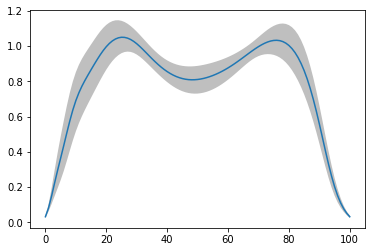

In [70]:
A.plot()

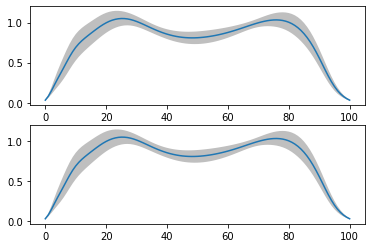

In [54]:
fig, ax = plt.subplots(2)

A.plot(ax[0])
B.plot(ax[1])

In [74]:
C = GRFSET('GRF_F_AP_PRO_right.csv')

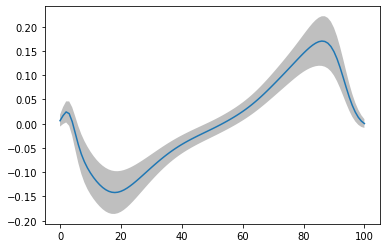

In [75]:
C.plot()

In [76]:
D = GRFSET('GRF_F_AP_PRO_left.csv')

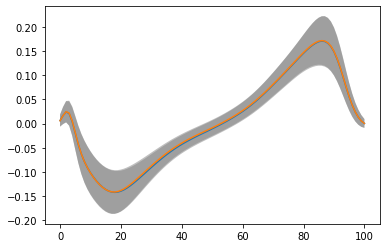

In [77]:
C.plot()
D.plot()

In [78]:
import sys
sys.path.append("/home/frekle/github/opensimrt/catkin_ws/tmp/refdata/refdata")
import refdata



In [137]:
from copy import copy


class GRFWalkingRefData(refdata.RefData):
    def __init__(self):
        super(GRFWalkingRefData,self).__init__( "Walking")
            
    def set_myself(self):

        #A = GRFSET('GRF_F_V_PRO_left.csv')
        #B = GRFSET('GRF_F_V_PRO_right.csv')
        
        #C = GRFSET('GRF_F_AP_PRO_left.csv')
        #D = GRFSET('GRF_F_AP_PRO_right.csv')
        
        #E = GRFSET('GRF_F_ML_PRO_left.csv')
        #F = GRFSET('GRF_F_ML_PRO_right.csv')
        
        
        
        for axis, movement_direction in zip(["x","y","z"], ["AP","V","ML"]):
            self.reference_curve_dict.update({"the_ground_force_v%s"%axis:[refdata.RefDataPrimitive(),refdata.RefDataPrimitive()]})
            for i, side in enumerate(["left", "right"]):
                #print(i)
                set_name = 'GRF_F_%s_PRO_%s.csv'%(movement_direction,side)
                this_set = GRFSET(set_name)
                #print(set_name)
                #print(this_set.set_mean)
                
                self.reference_curve_dict["the_ground_force_v%s"%axis][i].name = "%s Force %s"%(movement_direction, side)
                self.reference_curve_dict["the_ground_force_v%s"%axis][i].mean = copy(this_set.set_mean)
                self.reference_curve_dict["the_ground_force_v%s"%axis][i].sd = copy(this_set.std_dev)
                self.reference_curve_dict["the_ground_force_v%s"%axis][i].x = copy(this_set.x)
        

In [138]:
grfRef = GRFWalkingRefData()


In [139]:
grfRef.set_myself()

0
GRF_F_AP_PRO_left.csv
[ 0.0059236   0.01669647  0.02469496  0.02160235  0.00524348 -0.01868018
 -0.04261578 -0.06258382 -0.07837373 -0.09116365 -0.10193979 -0.11123204
 -0.11927614 -0.12612824 -0.13176674 -0.13615203 -0.13922389 -0.14091969
 -0.14122372 -0.14020223 -0.13799443 -0.13478128 -0.13076658 -0.12613886
 -0.121063   -0.11567695 -0.11009237 -0.10439998 -0.09867146 -0.09296511
 -0.08732728 -0.08179434 -0.07639453 -0.07115261 -0.06609056 -0.06122835
 -0.05658057 -0.05215547 -0.04795434 -0.04397143 -0.04019337 -0.03660207
 -0.03317497 -0.02988798 -0.02671594 -0.02363371 -0.0206164  -0.01763886
 -0.01467641 -0.01170415 -0.00869797 -0.00563371 -0.0024938   0.00073528
  0.00406207  0.00749564  0.01104915  0.01473994  0.01858817  0.02261428
  0.02683734  0.03127549  0.03594222  0.04084761  0.04599459  0.05137787
  0.05698332  0.06278836  0.06876532  0.074886    0.08112511  0.0874637
  0.09388911  0.10039343  0.1069714   0.11361618  0.12031354  0.12703293
  0.13372354  0.14031062  0.

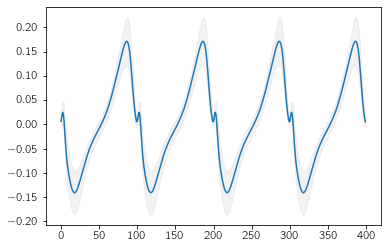

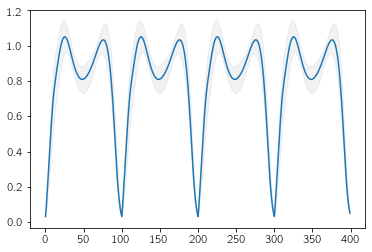

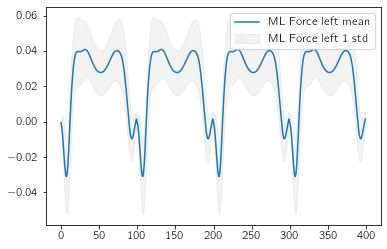

In [141]:
grfRef.plot()
plt.legend()

In [133]:
grfRef.reference_curve_dict['the_ground_force_vx'][2].sd

IndexError: list index out of range

In [121]:
gait = refdata.GaitNormativeRefData()

In [122]:
gait.plot()

In [123]:
gait.reference_curve_dict

{}